# Introduction to   
# `SEML`: Slurm Experiment Management Library

## Why `SEML`?

In a nutshell, **`SEML`** enables you to leverage the massive parallelization of a compute cluster without boilerplate code or having to worry about keeping track of experiments.
That is, it enables you to:
* very easily define hyperparameter search spaces using YAML files,
* run these hyperparameter configurations on a compute cluster using `Slurm`,
* and to track the experimental results using `sacred` and `MongoDB`.


In addition, **`SEML`** offers many more features to make your life easier, such as
* automatically saving and loading your source code for reproducibility,
* collecting experiment results into a `Pandas` dataframe,
* easy debugging on Slurm or locally,
* automatically checking your experiment configurations,
* extending Slurm with local workers,
* and keeping track of resource usage (experiment runtime, RAM, etc.).

You can even get notified on Mattermost whenever an experiment starts, completes, or fails!

## How does it work?

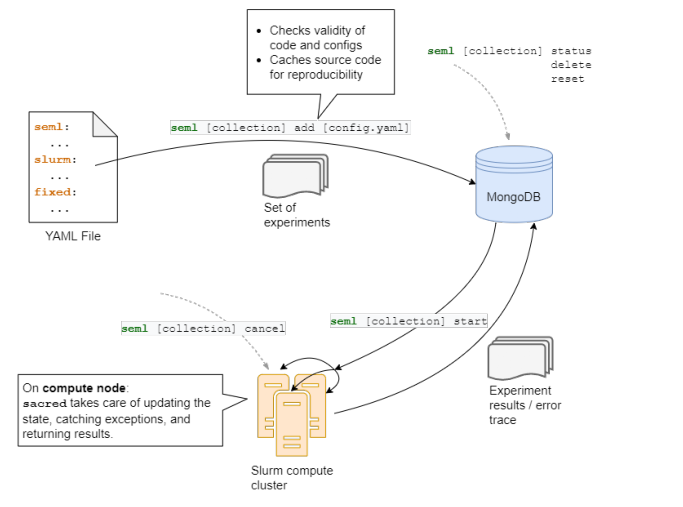

In [16]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
img = mpimg.imread("seml.png")
plt.axis("off")
plt.imshow(img);

## How does it work?
* **`SEML`** takes a `YAML` file containing hyperparameters and metadata about a set of experiments.
* **`SEML`** stores each individual experiment's data as an entry in a `MongoDB` database collection.
* In general, each type of experiments gets their own database collection.
* Each individual experiment is an entry in the respective collection.
* A database entry is essentially a `JSON` dictionary containing (among others):
  * the state of the experiment
  * the experiment configuration (i.e., hyperparameters),
  * the generated results, and
  * the cached source code (by default).

In [ ]:
from IPython.display import Markdown, display

with open("example_experiment.py", "r") as f:
    code = f.read()
display(
    Markdown(f"""```python
{code}
```""")
)

In [ ]:
with open("example_config.yaml", "r") as f:
    config = f.read()
display(
    Markdown(f"""```yaml
{config}
```
""")
)

In [ ]:
! seml seml_tutorial add example_config.yaml

In [ ]:
! seml seml_tutorial status

In [ ]:
! seml seml_tutorial start

In [ ]:
!squeue -u $(whoami)

In [ ]:
! seml seml_tutorial status

In [ ]:
! seml seml_tutorial reset -y reload-sources -y start
# Identical to:
# seml seml_tutorial reset
# seml seml_tutorial reload-sources
# seml seml_tutorial start

In [ ]:
! seml seml_tutorial status

In [ ]:
! seml seml_tutorial delete -s COMPLETED

In [ ]:
import seml
from matplotlib import pyplot as plt

results = seml.get_results("seml_tutorial", to_data_frame=True)
results

In [ ]:
for i, exp in results.iterrows():
    plt.plot(
        exp["result.test_acc"],
        label=f'{exp["config.hidden_sizes"]} {exp["config.learning_rate"]}',
    )
plt.legend()
plt.show()

In [ ]:
! seml jupyter

In [ ]:
! scancel 6537602

## More examples (including this one)!
https://github.com/TUM-DAML/seml/tree/master/examples